## Predicting Airline Customer Satisfaction using Machine Learning

##### Let's import our data and the libraries needed to work with our data

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("C:/Users/hamza/Documents/Airline-Customer-Satisfaction/airline_passenger_satisfaction.csv")

In [91]:
data.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


##### Key points about our data:
* Our target variable is satisfaction, which has 2 labels ("satisfied" or "neutral or dissatisfied")
* We have 4 categorical features, and the rest are numerical

### Step 1) Data cleaning

In [94]:
# our first column contains an index for each row, which is not required
data_cleaned = data.drop(columns=['Unnamed: 0'])

In [95]:
# checking for missing values
data_cleaned.isnull().sum()

Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

##### The "arrival_delay_in_minutes" column is missing data in 393 rows. This requires imputation. Let's see which metric should be used to replace the missing values, mean or median.

In [97]:
data_cleaned['arrival_delay_in_minutes'].mean()

15.09112883918849

In [98]:
data_cleaned['arrival_delay_in_minutes'].median()

0.0

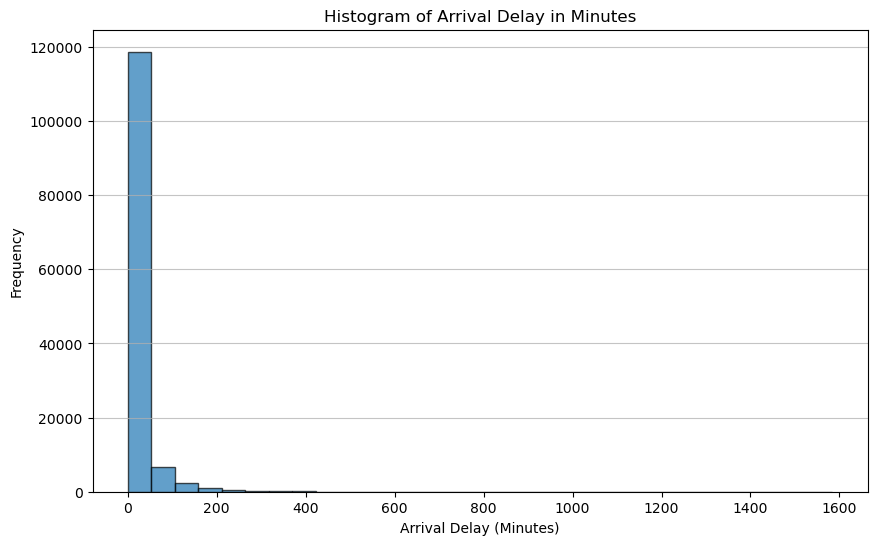

In [99]:
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['arrival_delay_in_minutes'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Arrival Delay in Minutes')
plt.xlabel('Arrival Delay (Minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

##### The median of the arrival delay column is 0, and the mean is 15.09, and in this case it is more appropriate to impute the missing values with the mean. Let's do that now.

In [101]:
mean_arrival_delay = data_cleaned['arrival_delay_in_minutes'].mean()
data_cleaned['arrival_delay_in_minutes'] = data_cleaned['arrival_delay_in_minutes'].fillna(mean_arrival_delay)

##### Let's check the data types of our columns and make sure they are all correct.

In [103]:
data_cleaned.dtypes

Gender                                object
customer_type                         object
age                                    int64
type_of_travel                        object
customer_class                        object
flight_distance                        int64
inflight_wifi_service                  int64
departure_arrival_time_convenient      int64
ease_of_online_booking                 int64
gate_location                          int64
food_and_drink                         int64
online_boarding                        int64
seat_comfort                           int64
inflight_entertainment                 int64
onboard_service                        int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
inflight_service                       int64
cleanliness                            int64
departure_delay_in_minutes             int64
arrival_delay_in_minutes             float64
satisfacti

##### The arrival delay column is a float, and the departure delay is an int. Let's change arrival delay to int as well.

In [105]:
data_cleaned['arrival_delay_in_minutes'] = data_cleaned['arrival_delay_in_minutes'].astype('int64')

In [106]:
data_cleaned.dtypes

Gender                               object
customer_type                        object
age                                   int64
type_of_travel                       object
customer_class                       object
flight_distance                       int64
inflight_wifi_service                 int64
departure_arrival_time_convenient     int64
ease_of_online_booking                int64
gate_location                         int64
food_and_drink                        int64
online_boarding                       int64
seat_comfort                          int64
inflight_entertainment                int64
onboard_service                       int64
leg_room_service                      int64
baggage_handling                      int64
checkin_service                       int64
inflight_service                      int64
cleanliness                           int64
departure_delay_in_minutes            int64
arrival_delay_in_minutes              int64
satisfaction                    

##### Let's encode our categorical features now so they can be fed into our model properly.

In [108]:
categorical_features = ['Gender', 'customer_type', 'type_of_travel', 'customer_class']
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_features, drop_first=True)

##### Let's also encode our target feature.

In [110]:
data_encoded['satisfaction'] = data_encoded['satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})

In [111]:
data_encoded.head()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,...,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18,0,True,False,True,False,True
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6,0,True,True,False,False,False
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0,1,False,False,False,False,False
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9,0,False,False,False,False,False
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0,1,True,False,False,False,False


##### It seems our customer loyalty column has defaulted to showing us True or False for disloyal customers, whereas we want our values to show us True or False for loyal customers. Let's change that.

In [113]:
data_encoded['customer_type_loyal Customer'] = ~data_encoded['customer_type_disloyal Customer']
data_encoded['customer_type_loyal Customer'] = data_encoded['customer_type_loyal Customer'].astype(bool)

In [114]:
data_encoded.head()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,...,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus,customer_type_loyal Customer
0,13,460,3,4,3,1,5,3,5,5,...,5,25,18,0,True,False,True,False,True,True
1,25,235,3,2,3,3,1,3,1,1,...,1,1,6,0,True,True,False,False,False,False
2,26,1142,2,2,2,2,5,5,5,5,...,5,0,0,1,False,False,False,False,False,True
3,25,562,2,5,5,5,2,2,2,2,...,2,11,9,0,False,False,False,False,False,True
4,61,214,3,3,3,3,4,5,5,3,...,3,0,0,1,True,False,False,False,False,True


In [115]:
comparison_df = data_encoded[['customer_type_disloyal Customer', 'customer_type_loyal Customer']].copy()
comparison_df['are_opposites'] = comparison_df['customer_type_disloyal Customer'] == ~comparison_df['customer_type_loyal Customer']
comparison_df.head()

,customer_type_disloyal Customer,customer_type_loyal Customer,are_opposites
0,False,True,True
1,True,False,True
2,False,True,True
3,False,True,True
4,False,True,True


##### Our changes have been made correctly, so let's drop our "customer_type_disloyal Customer" column

In [117]:
data_encoded.drop(columns=['customer_type_disloyal Customer'], inplace=True)

### Step 2) Exploratory Data Analysis

##### Let's see if the distribution of our target feature is normal.

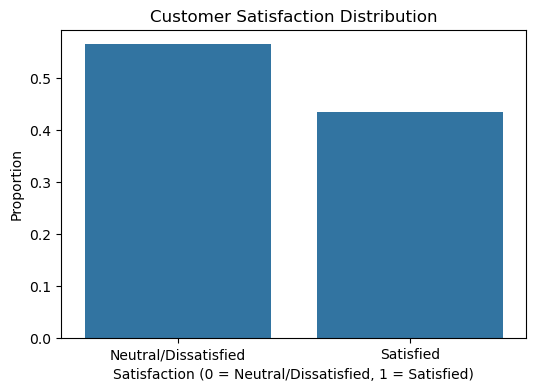

In [120]:
import seaborn as sns

satisfaction_counts = data_encoded['satisfaction'].value_counts(normalize=True)

plt.figure(figsize=(6, 4))
sns.barplot(x=satisfaction_counts.index, y=satisfaction_counts.values)
plt.title('Customer Satisfaction Distribution')
plt.xlabel('Satisfaction (0 = Neutral/Dissatisfied, 1 = Satisfied)')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Neutral/Dissatisfied', 'Satisfied'])
plt.show()

##### Our target feature is relatively balanced.

##### Let's look at the correlation of our numerical features using a heatmap.

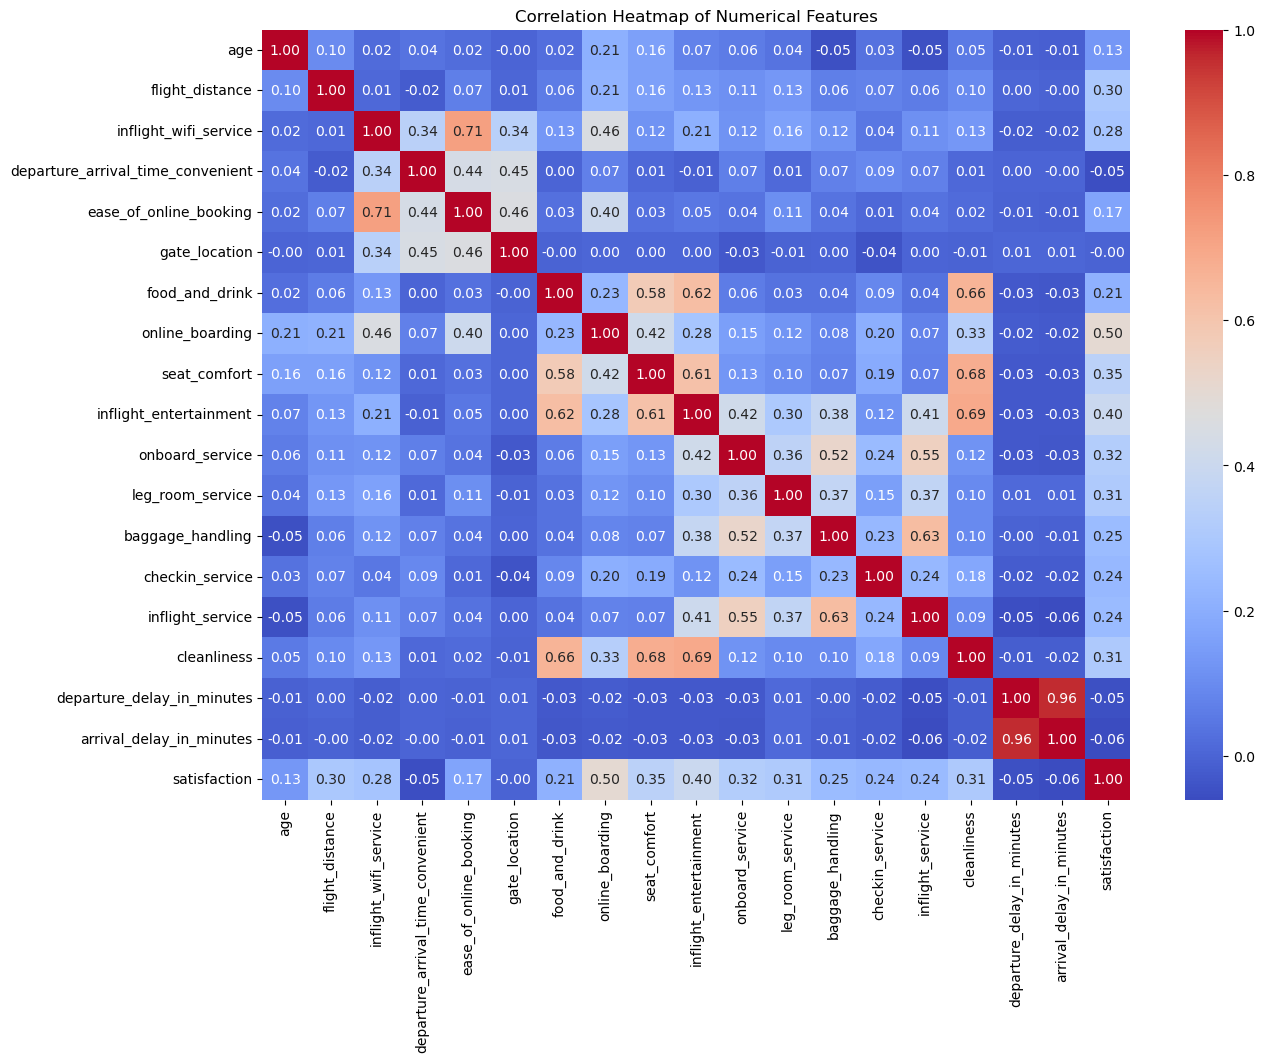

In [123]:
numerical_features = data_encoded.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data_encoded[numerical_features].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

##### There seems to be a strong correlation between satisfaction and:
* flight distance
* online boarding options
* seat comfort
* inflight entertainment
* leg room

##### There seems to be very weak correlation between satisfaction and:
* age
* convenience of departure time
* gate location
* departure delay

##### Let's visualize the correlation between flight length and satisfaction.

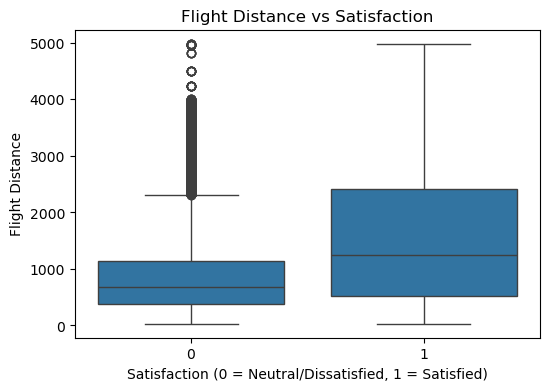

In [126]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='satisfaction', y='flight_distance', data=data_encoded)
plt.title('Flight Distance vs Satisfaction')
plt.xlabel('Satisfaction (0 = Neutral/Dissatisfied, 1 = Satisfied)')
plt.ylabel('Flight Distance')
plt.show()

##### Customers with longer flights seem to be more likley to report being satisfied with their experience. This might indicate that flight distance influences overall experience.

##### Let's visualize the correlation between online boarding options and satisfaction.

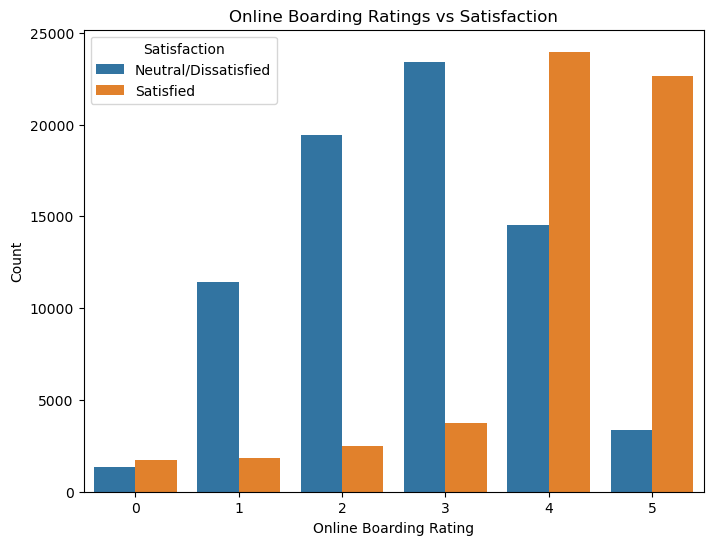

In [129]:
plt.figure(figsize=(8, 6))
sns.countplot(x='online_boarding', hue='satisfaction', data=data_encoded)
plt.title('Online Boarding Ratings vs Satisfaction')
plt.xlabel('Online Boarding Rating')
plt.ylabel('Count')
plt.legend(title='Satisfaction', loc='upper left', labels=['Neutral/Dissatisfied', 'Satisfied'])
plt.show()

##### Good online boarding options are strongly related to satifaction, which indicates this features importance in model development.

### Step 3) Baseline Modeling

##### Let's start by determining the ranges for each feature in our dataset so we can properly scale our features when needed.

In [133]:
numerical_columns = data_encoded.select_dtypes(include=['float64', 'int64']).columns
ranges = data[numerical_columns].agg(['min', 'max']).T
ranges.columns = ['Min', 'Max']
print(ranges)

                                                       Min        Max
age                                                      7         85
flight_distance                                         31       4983
inflight_wifi_service                                    0          5
departure_arrival_time_convenient                        0          5
ease_of_online_booking                                   0          5
gate_location                                            0          5
food_and_drink                                           0          5
online_boarding                                          0          5
seat_comfort                                             0          5
inflight_entertainment                                   0          5
onboard_service                                          0          5
leg_room_service                                         0          5
baggage_handling                                         1          5
checkin_service     

##### We can see that there are 3 features that require scaling for certain models.

##### We are going to create 2 baseline models: Logistic Regression and Decision Tree. 

##### We are also going to create 3 advanced models: Random Forest, XGBoost, MLP Classifier. 

##### Scaling is only needed for the Logistic Regression and the MLP Classifier.

In [182]:
X = data_encoded.drop(columns=['satisfaction'])  # Replace 'satisfaction' with your target column
y = data_encoded['satisfaction']

from sklearn.preprocessing import StandardScaler

X_scaled = X.copy()  # Create a copy of X for scaled data
X_scaled[columns_to_scale] = scaler.fit_transform(X_scaled[columns_to_scale])

##### Now we can use a Grid Search to find the optimal hyperparameters for a Logistic Regression model and measure its performance

In [190]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

param_grid = {
    'penalty': ['l2', 'l1'],  # Compatible penalties
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Compatible solvers for 'l1' and 'l2'
    'max_iter': [100, 500]  # Iteration limits
}

grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

best_logistic_model = grid_search.best_estimator_

y_pred = best_logistic_model.predict(X_test_scaled)

In [204]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted average
recall = recall_score(y_test, y_pred, average='weighted')        # Weighted average
f1 = f1_score(y_test, y_pred, average='weighted')                # Weighted average

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8763
Precision: 0.8762
Recall: 0.8763
F1-Score: 0.8760


##### Our baseline Logistic Regression model achieved high evaluation metrics, making it a good predictor for airline customer satsifaction.

##### Lets move onto our Decision Tree. We use unscaled data for this model.

In [211]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [None, 5, 10, 20],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],     # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],       # Minimum samples required in a leaf
    'criterion': ['gini', 'entropy']     # Splitting criteria
}

# Set up GridSearchCV for Decision Tree
grid_search_tree = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    scoring='f1_weighted',  # Optimize for weighted F1-score
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search_tree.fit(X_train, y_train)

# Extract the best model
best_tree = grid_search_tree.best_estimator_

# Evaluate the best model on the test set
y_pred_tree = best_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree, average='weighted')
recall = recall_score(y_test, y_pred_tree, average='weighted')
f1 = f1_score(y_test, y_pred_tree, average='weighted')

In [213]:
# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9539
Precision: 0.9540
Recall: 0.9539
F1-Score: 0.9538


##### Our Decision Tree does an excellent job at predicting airline customer satisfaction. It scores 95% in all 4 of our evaluation metrics.

### Step 4) Advanced Models

##### Lets start with our Random Forest. We use unscaled data for this model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees
    'max_depth': [None, 10, 20, 30],       # Maximum tree depth
    'min_samples_split': [2, 5, 10],       # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],         # Minimum samples in a leaf node
    'criterion': ['gini', 'entropy']       # Splitting criteria
}

# Set up GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='f1_weighted',  # Optimize for weighted F1-score
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Extract the best model
best_rf = grid_search_rf.best_estimator_

# Evaluate the best model on the test set
y_pred_rf = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

In [ ]:
# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")